In [1]:
import numpy as np
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt

import keijzer_exogan as ke

from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm

%matplotlib inline
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"} # Make sure the axis background of plots is white, this is usefull for the black theme in JupyterLab

# Initialize default seaborn layout
sns.set_palette(sns.hls_palette(8, l=.3, s=.8))
sns.set(style='ticks') 

In [2]:
path = '/datb/16011015/ExoGAN_data/selection//' #notice how you dont put the last folder in here...
images = np.load(path+'test.npy').astype('float32')

len(images)

5000

In [3]:
images.shape

(5000, 1, 32, 32)

In [4]:
images = images.reshape([images.shape[0], 32, 32]) # remove the channel dimension

In [5]:
# Plot some images

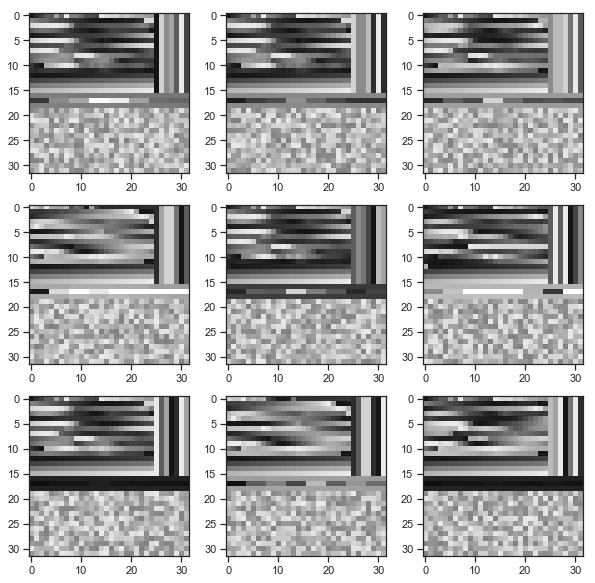

In [7]:
plt.figure(figsize=(10,10))
for i in range(9):
    n = np.random.randint(0, len(images)) # make sure the 9 images are a random selection
    img = images[n]
    plt.subplot(3,3,i+1)
    plt.imshow(img, cmap='gray', vmin=-1.2, vmax=1.2)

# Looking at the params

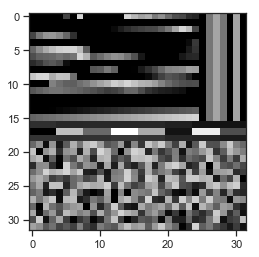

In [8]:
img = images[0] # select one image
plt.imshow(img, cmap='gray', vmin=0, vmax=1.2)

In [9]:
params = ['planet_mass','temp_profile','ch4_mixratio','planet_radius','h2o_mixratio','co2_mixratio','co_mixratio']

In [10]:
%%time
params_values = [images[:, :16, 25+i:26+i].mean(1) for i in range(len(params))] # select param line, take mean of line, make list of all lines in ndarray per param

params_values_mean = [val.mean() for val in params_values] # mean of all values per param
params_values_std = [val.std() for val in params_values] # std of all values per param

CPU times: user 11.1 ms, sys: 0 ns, total: 11.1 ms
Wall time: 10.3 ms


In [11]:
for i,param in enumerate(params):
    print(param+' \t mean: %.1f \t std: %.2f'% (params_values_mean[i], params_values_std[i]))

planet_mass 	 mean: -0.0 	 std: 0.64
temp_profile 	 mean: 0.0 	 std: 0.64
ch4_mixratio 	 mean: 0.0 	 std: 0.64
planet_radius 	 mean: 0.0 	 std: 0.64
h2o_mixratio 	 mean: -0.0 	 std: 0.63
co2_mixratio 	 mean: 0.0 	 std: 0.64
co_mixratio 	 mean: -0.0 	 std: 0.64


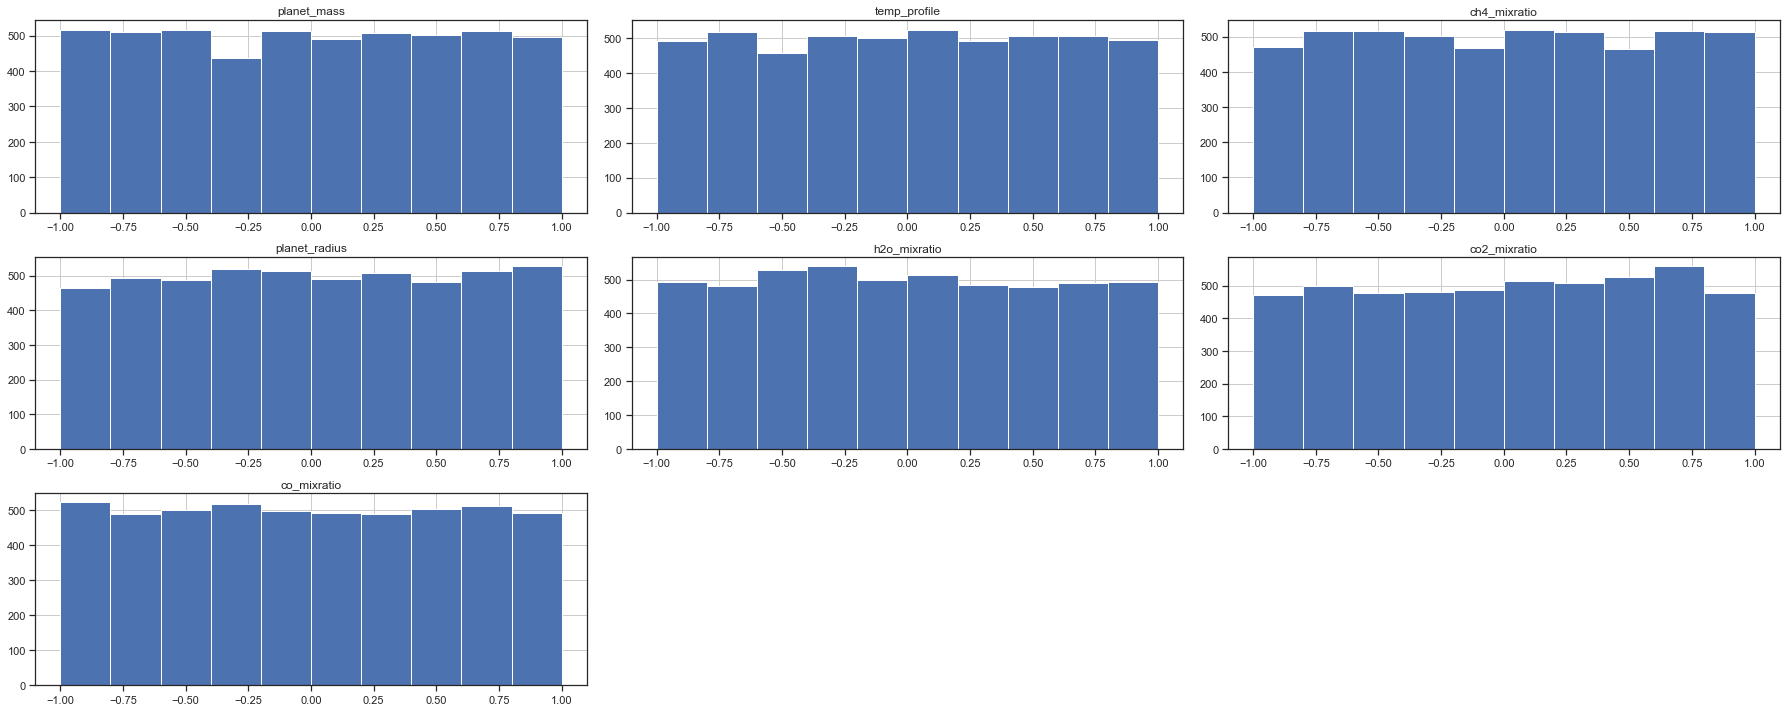

In [12]:
plt.figure(figsize=((25,10)))
for i,param_values in enumerate(params_values):
    plt.subplot(3,3,i+1)
    plt.title(params[i])
    plt.hist(param_values, bins=10)
    plt.grid()
    plt.tight_layout()

# General ASPA statistics

In [13]:
%%time

mean = images.mean()
std = images.std()
min_ = images.min()
max_= images.max()

print('mean: ', mean)
print('std: ', mean)
print('min: ', min_)
print('max: ', max_)

mean:  0.14883485
std:  0.14883485
min:  -1.0900413
max:  16.908192
CPU times: user 383 ms, sys: 107 ms, total: 490 ms
Wall time: 41.1 ms


# Spectra EDA

In [14]:
spectra = images[:, :16, :25]
spectra.shape

(5000, 16, 25)

In [15]:
mean_ = spectra.mean(0)
std_ = spectra.std(0)

# Heatmap of spectra $\mu$ and $\sigma$

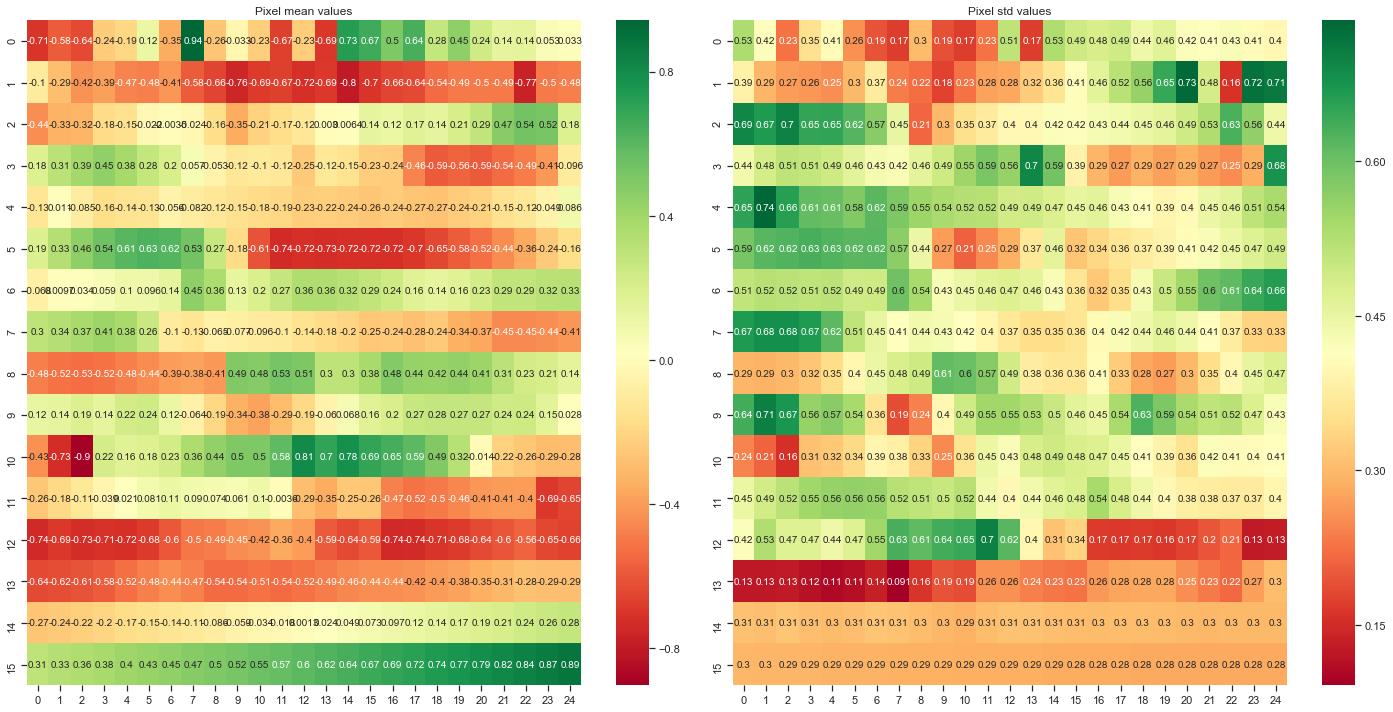

In [16]:
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.title('Pixel mean values')
sns.heatmap(mean_, square=False, cmap='RdYlGn', annot=True)

plt.subplot(1,2,2)
plt.title('Pixel std values')
sns.heatmap(std_, square=False, cmap='RdYlGn', annot=True)

plt.tight_layout()

In [17]:
mins_ = [images[:, 16:17, i*4:i*4+4].mean(2) for i in range(8)]
stds_ = [images[:, 17:18, i*4:i*4+4].mean(2) for i in range(8)]
maxs_ = [images[:, 18:19, i*4:i*4+4].mean(2) for i in range(8)]

In [18]:
for i in range(8):
    print('='*50)
    print('mins %s: \t mean: %.3f \t std: %.3f'%(i, mins_[i].mean(), mins_[i].std()))
    print('stds %s: \t mean: %.3f \t std: %.3f'%(i, stds_[i].mean(), stds_[i].std()))
    print('maxs %s: \t mean: %.3f \t std: %.3f'%(i, maxs_[i].mean(), maxs_[i].std()))

mins 0: 	 mean: -0.222 	 std: 0.453
stds 0: 	 mean: -0.831 	 std: 0.276
maxs 0: 	 mean: -0.214 	 std: 0.458
mins 1: 	 mean: -0.234 	 std: 0.445
stds 1: 	 mean: -0.464 	 std: 0.696
maxs 1: 	 mean: -0.219 	 std: 0.455
mins 2: 	 mean: -0.234 	 std: 0.445
stds 2: 	 mean: -0.338 	 std: 0.759
maxs 2: 	 mean: -0.214 	 std: 0.458
mins 3: 	 mean: -0.238 	 std: 0.443
stds 3: 	 mean: 0.182 	 std: 1.521
maxs 3: 	 mean: -0.206 	 std: 0.462
mins 4: 	 mean: -0.241 	 std: 0.441
stds 4: 	 mean: 0.098 	 std: 1.118
maxs 4: 	 mean: -0.208 	 std: 0.461
mins 5: 	 mean: -0.248 	 std: 0.437
stds 5: 	 mean: -0.395 	 std: 0.619
maxs 5: 	 mean: -0.229 	 std: 0.449
mins 6: 	 mean: -0.262 	 std: 0.429
stds 6: 	 mean: -0.422 	 std: 0.644
maxs 6: 	 mean: -0.242 	 std: 0.441
mins 7: 	 mean: -0.264 	 std: 0.428
stds 7: 	 mean: -0.389 	 std: 0.608
maxs 7: 	 mean: -0.246 	 std: 0.439


# Heatmap of complete aspas

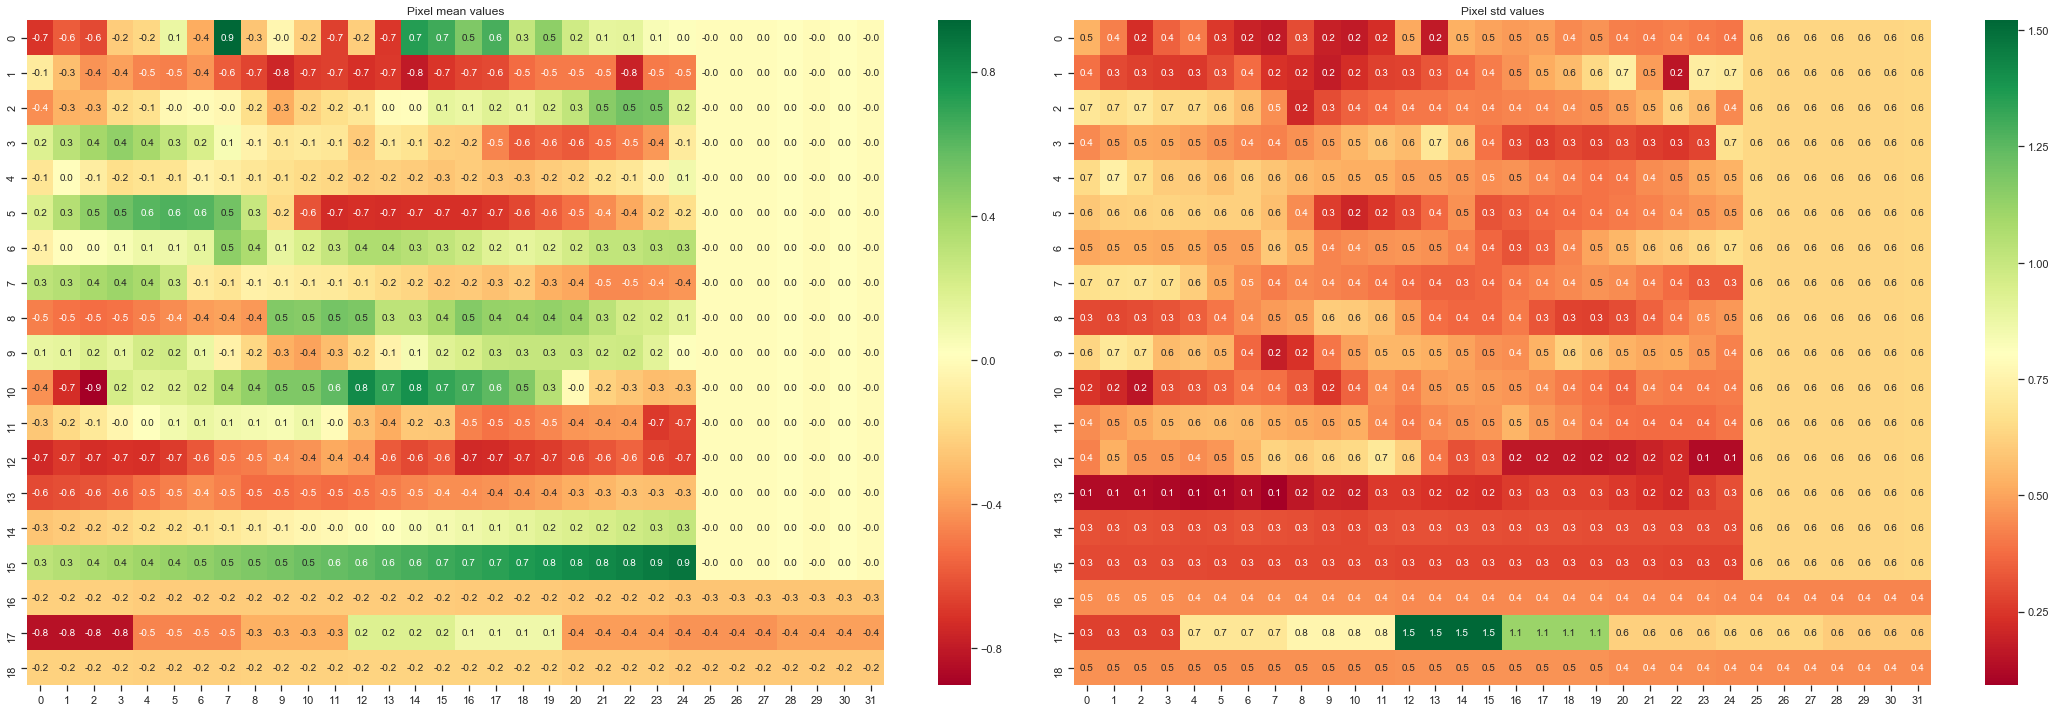

In [19]:
plt.figure(figsize=(30,10))

plt.subplot(1,2,1)
plt.title('Pixel mean values')
sns.heatmap(images[:, :19, :].mean(0), square=False, cmap='RdYlGn', annot=True, fmt='.1f')

plt.subplot(1,2,2)
plt.title('Pixel std values')
sns.heatmap(images[:, :19, :].std(0), square=False, cmap='RdYlGn', annot=True, fmt='.1f')

plt.tight_layout()

# EDA on individual spectra bins